In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random
import os
import json

# Dataset cleaning

In [2]:
path = '../Dataset/Dataset.tsv'

# Read the dataset
df = pd.read_csv(path, sep='\t')

df.head()

,Study ID,Patient ID,Sample ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,...,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Number of Samples Per Patient,Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,mds_iwg_2022,E-H-100000,E-H-100000-T1-1-D1-1,57.0,4.65,3.0,normal,NaN,5q,NaN,...,69.830137,0:LIVING,0.0,406.0,NaN,1,Female,23.920896,7.50,MDS-del5q
1,mds_iwg_2022,E-H-100001,E-H-100001-T1-1-D1-1,56.0,2.88,2.0,normal,NaN,5q,NaN,...,34.290411,0:LIVING,0.0,364.0,NaN,1,Female,6.523881,7.21,MDS-del5q
2,mds_iwg_2022,E-H-100002,E-H-100002-T1-1-D1-1,72.0,0.49,15.0,cnloh,NaN,5q,17p,...,3.682192,1:DECEASED,0.0,35.0,NaN,1,Female,6.523881,2.60,MDS-EB2
3,mds_iwg_2022,E-H-100004,E-H-100004-T1-1-D1-1,40.0,1.56,3.0,normal,NaN,NaN,NaN,...,62.235616,0:LIVING,0.0,708.0,NaN,1,Female,4.349254,2.55,MDS/MPN-U
4,mds_iwg_2022,E-H-100005,E-H-100005-T1-1-D1-1,45.0,1.25,2.0,normal,NaN,NaN,NaN,...,67.758904,0:LIVING,0.0,141.0,NaN,1,Female,6.523881,2.31,MDS-MLD


Gathering information about the dataset...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study ID                         3323 non-null   object 
 1   Patient ID                       3323 non-null   object 
 2   Sample ID                        3323 non-null   object 
 3   Age in years                     3303 non-null   float64
 4   Absolute Neutrophil Count (G/L)  3130 non-null   float64
 5   BM Blast (%)                     3214 non-null   float64
 6   Chromosomal Status at TP53       3323 non-null   object 
 7   CNACS Called Chr Arm Gain        159 non-null    object 
 8   CNACS Called Chr Arm Loss        668 non-null    object 
 9   CNACS Called Chr Arm Upd         359 non-null    object 
 10  CNACS Called Gene Gain           150 non-null    object 
 11  CNACS Called Gene Loss           647 non-null    object 
 12  CNACS Called Gene Up

In [4]:
#drop column Study ID
df = df.drop(['Study ID'], axis=1)
df = df.drop(['Sample ID'], axis=1)
df = df.drop(['Number of Samples Per Patient'], axis=1)

In [5]:
df

,Patient ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,CNACS Called Gene Gain,CNACS Called Gene Loss,...,Mutation Count,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,E-H-100000,57.0,4.65,3.0,normal,NaN,5q,NaN,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,11.0,69.830137,0:LIVING,0.0,406.0,NaN,Female,23.920896,7.50,MDS-del5q
1,E-H-100001,56.0,2.88,2.0,normal,NaN,5q,NaN,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,3.0,34.290411,0:LIVING,0.0,364.0,NaN,Female,6.523881,7.21,MDS-del5q
2,E-H-100002,72.0,0.49,15.0,cnloh,NaN,5q,17p,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,3.0,3.682192,1:DECEASED,0.0,35.0,NaN,Female,6.523881,2.60,MDS-EB2
3,E-H-100004,40.0,1.56,3.0,normal,NaN,NaN,NaN,NaN,NaN,...,2.0,62.235616,0:LIVING,0.0,708.0,NaN,Female,4.349254,2.55,MDS/MPN-U
4,E-H-100005,45.0,1.25,2.0,normal,NaN,NaN,NaN,NaN,NaN,...,3.0,67.758904,0:LIVING,0.0,141.0,NaN,Female,6.523881,2.31,MDS-MLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,I-H-132725,69.0,0.60,12.0,normal,NaN,NaN,NaN,NaN,NaN,...,6.0,51.484932,0:LIVING,0.0,61.0,0.0,Male,13.047761,2.00,MDS-EB2
3319,I-H-132726,60.0,0.50,15.0,normal,NaN,NaN,NaN,NaN,NaN,...,2.0,27.353425,0:LIVING,0.0,383.0,0.0,Female,4.349254,1.90,MDS-EB2
3320,I-H-132727,58.0,1.00,5.0,normal,NaN,NaN,NaN,NaN,NaN,...,3.0,6.936986,0:LIVING,0.0,44.0,0.0,Male,6.523881,2.30,MDS-EB1
3321,I-H-132728,79.0,40.10,2.0,normal,NaN,NaN,NaN,NaN,NaN,...,6.0,15.419178,1:DECEASED,0.0,14.0,0.0,Male,13.047761,44.90,MDS/MPN-U


In [6]:
col_names = list(df.columns.values)
for col in col_names:
    print(col+'\t')
    n = len(df[col].unique())
    print(df[col].unique())
    print('total of uniques: ', n)
    print('------------------------')

Patient ID	
['E-H-100000' 'E-H-100001' 'E-H-100002' ... 'I-H-132727' 'I-H-132728'
 'I-H-132729']
total of uniques:  3323
------------------------
Age in years 	
[ 57.  56.  72.  40.  45.  54.  53.  60.  59.  33.  21.  63.  58.  67.
  66.  61.  64.  29.  83.  78.  73.  79.  70.  80.  52.  95.  77.  81.
  65.  76.  82.  50.  88.  87.  74.  62.  68.  75.  48.  55.  69.  46.
  51.  71.  85.  43.  49.  92.  84.  44.  34.  37.  36.  47.  42.  23.
  19.  35.  22.  91.  28.  41.  31.  89.  30.  86.  39.  38.  26.  20.
  18.  16.  nan  32. 100.  93.  94.  90.  27.  99.  96.  97.  98.  24.
  25.  12.]
total of uniques:  86
------------------------
Absolute Neutrophil Count (G/L)	
[ 4.65  2.88  0.49 ... 42.2  12.2  40.1 ]
total of uniques:  1027
------------------------
BM Blast (%)	
[ 3.   2.  15.   1.   9.  16.   0.  17.  13.  14.  19.  48.   7.  18.
  6.   8.   5.   4.  10.  11.  12.   1.4 11.5 25.  21.  29.  22.  45.
 80.  24.  90.  35.  37.  55.  27.  33.  28.  60.  38.  50.   0.5  2.5
  5.5

In [7]:
print(df['Overall Survival (Months)'])
print(df['Leukemia Free Survival (Months)'])

0       69.830137
1       34.290411
2        3.682192
3       62.235616
4       67.758904
          ...    
3318    51.484932
3319    27.353425
3320     6.936986
3321    15.419178
3322    25.413699
Name: Overall Survival (Months), Length: 3323, dtype: float64
0       69.830137
1       34.290411
2        2.695890
3       62.235616
4       55.758904
          ...    
3318    51.484932
3319    27.353425
3320     6.936986
3321    15.419178
3322          NaN
Name: Leukemia Free Survival (Months), Length: 3323, dtype: float64


### Random balanced coin toss

In [8]:
for i in range(0, len(df)):
  toss_1 = random.random()    #toss<0.5: Head 
                                  #toss>=0.5: Tail
  if (toss_1 >= 0.5):
    df.loc[i, 'random FLT3'] = df.loc[i, 'FLT3 ITD']

  else:
    toss_2 = random.random()  #toss<0.5: Head 
                                  #toss>=0.5: Tail
    if (toss_2 >= 0.5):
      df.loc[i, 'random FLT3'] = True
    else:
      df.loc[i, 'random FLT3'] = False

False    3297
True       26
Name: FLT3 ITD, dtype: int64


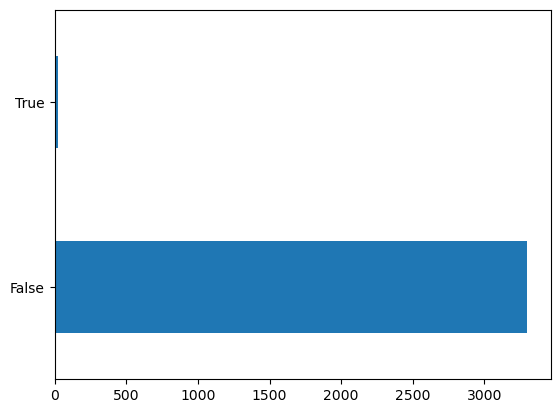

In [9]:
# True Histogram of FLT3 ITD
df['FLT3 ITD'].value_counts().plot(kind='barh')
print(df['FLT3 ITD'].value_counts())

False    2468
True      855
Name: random FLT3, dtype: int64


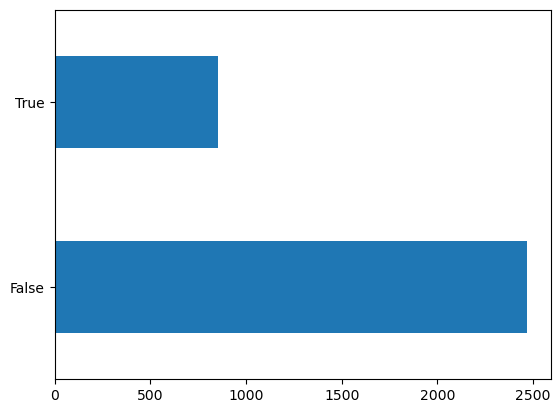

In [10]:
# Randomized Histogram of FLT3 ITD
df['random FLT3'].value_counts().plot(kind='barh')
print(df['random FLT3'].value_counts())

# Diffprivlib

In [11]:
import diffprivlib as dp

## Mechanisms

In [12]:
# Laplacian Noise
from diffprivlib.mechanisms import Laplace

mech = Laplace(epsilon=1.0, sensitivity=1.0)
print('Laplacian noise: ', mech.randomise(1.0))

# Gaussian Noise
from diffprivlib.mechanisms import GaussianAnalytic

mech = GaussianAnalytic(epsilon=1.0, delta=1.0, sensitivity=1.0)
print('Gaussian noise: ', mech.randomise(1.0))

Laplacian noise:  1.2916909824551892
Gaussian noise:  0.9567096912758883


## Models

### Prepare data

In [13]:
# Preparation of data for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
random.seed(0)

# Remove rows with missing values in the column Overall Survival Status
df = df.dropna(subset=['Overall Survival Status'])

# Prepare Labels
y = df['Overall Survival Status'].values
y = np.where(y == '0:LIVING', 0, y)
y = np.where(y == '1:DECEASED', 1, y)

# Encode the labels for the classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)
print(y_encoded.shape)

# Change values of the Sex column to 0 and 1 to be able to use it for the classification
sex_mapping = {'Male' : 0.0, 'Female' : 1.0}
df['Sex'] = df['Sex'].map(sex_mapping)

# Get all features with float values for the classification
X = df.select_dtypes(include=['float64']).values

# Fill nan values with mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
print(X)
print(X.shape)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

[0 0 1 ... 0 1 0]
(3173,)
[[57.          4.65        3.         ...  1.         23.92089577
   7.5       ]
 [56.          2.88        2.         ...  1.          6.52388067
   7.21      ]
 [72.          0.49       15.         ...  1.          6.52388067
   2.6       ]
 ...
 [58.          1.          5.         ...  0.          6.52388067
   2.3       ]
 [79.         40.1         2.         ...  0.         13.04776133
  44.9       ]
 [71.          0.5        20.         ...  0.          8.69850755
   1.3       ]]
(3173, 16)


/tmp/ipykernel_23316/98583802.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map(sex_mapping)


### Model without privacy

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definition of the model
model = LogisticRegression(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Accuracy of the model
accuracy_model = accuracy_score(y_test, y_pred)
print("Accuracy in the non Privacy Model: %.2f%% \n" % (accuracy_model* 100.0))

accuracy_model_score = []
accuracy_model_score.append(accuracy_model)

Accuracy in the non Privacy Model: 64.09% 



/home/kdf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model with epsilon Privacy

In [15]:
# ML models with differential privacy built-it
from diffprivlib.models import LogisticRegression
from sklearn.metrics import accuracy_score

# Anonimyzed model definition
privacy_model = LogisticRegression(epsilon=0.01, random_state=0, data_norm=2)

# Train the model
privacy_model.fit(X_train, y_train)

# Test the model
y_pred = privacy_model.predict(X_test)

# Accuracy
print("Accuracy in the Privacy Model: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

Accuracy in the Privacy Model: 48.50%


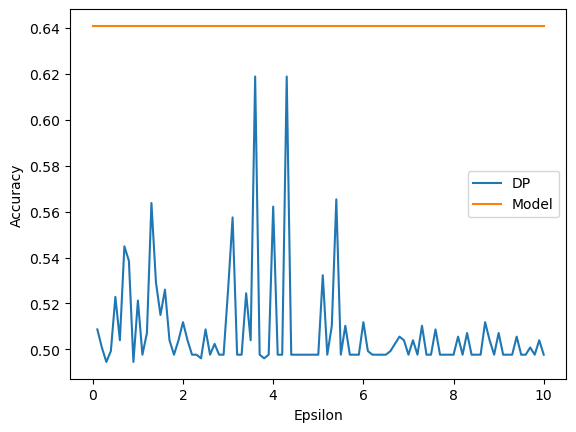

In [16]:
accuracy_dp_score = []
for epsilon in np.linspace(0.1, 10, 100):
    dp_model = LogisticRegression(epsilon=epsilon, data_norm=2)
    dp_model.fit(X_train, y_train)
    accuracy_dp_score.append(accuracy_score(y_test, dp_model.predict(X_test)))

plt.plot(np.linspace(0.1, 10, 100), accuracy_dp_score, label='DP')
plt.plot([0, 10], [accuracy_model_score[0], accuracy_model_score[0]], label='Model')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Tools

## Accountant